# Customer Personality Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_excel("marketing_campaign.xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA

In [3]:
data.shape

(2240, 29)

In [4]:
#sum of the total expenses and total accepted campaign of each customers.
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [5]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
#checking for duplicate values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

No duplicate data because each 2240 ID is unique.

In [7]:
data['Age'] = 2015 - data['Year_Birth']

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [9]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expenses,Total_Acc_Cmp,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1617,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,27,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,53,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,1341,0,48
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,444,1,69
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,1241,1,34
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,843,0,59


# Data Visualization

Text(0.5, 1.0, 'Age')

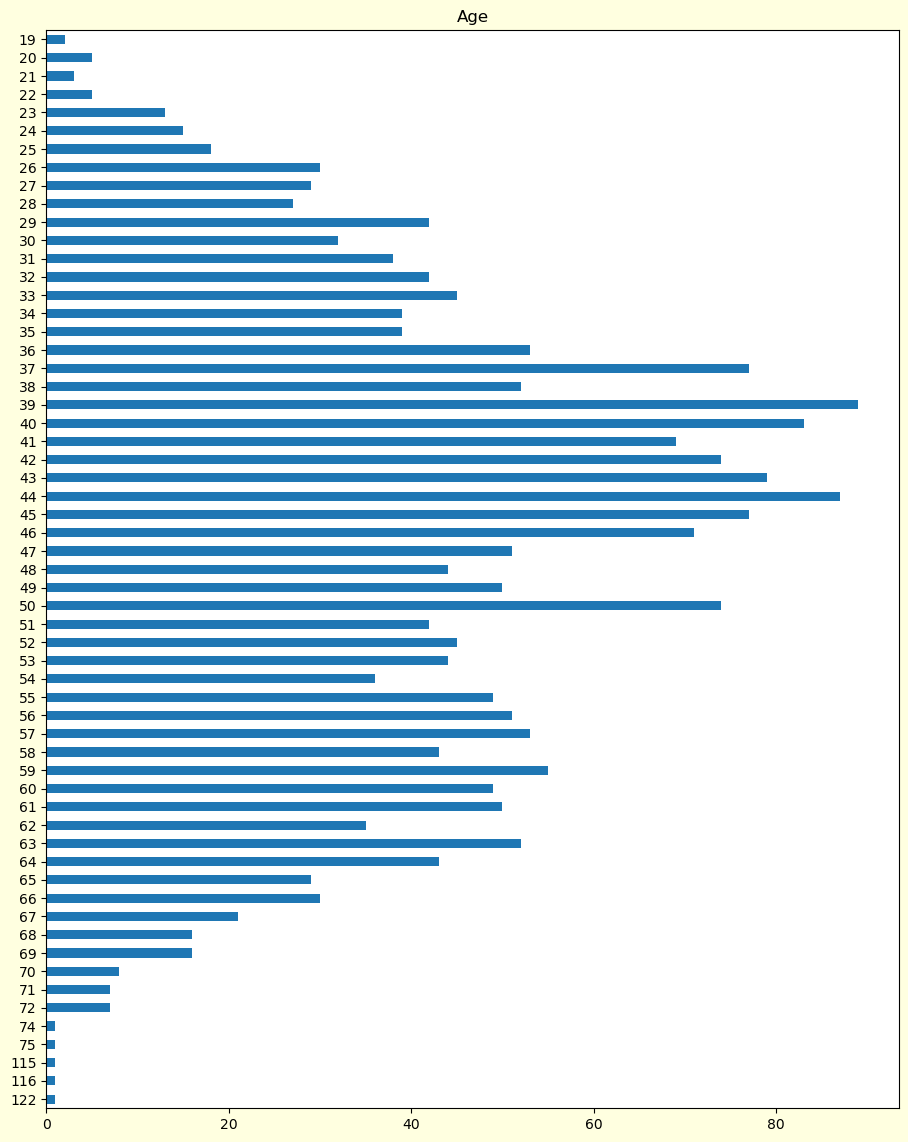

In [10]:
plt.figure(figsize=(11,14), facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

The age graph shows that the majority of clients are between the ages of 43 and 56.

Text(0.5, 1.0, 'Income')

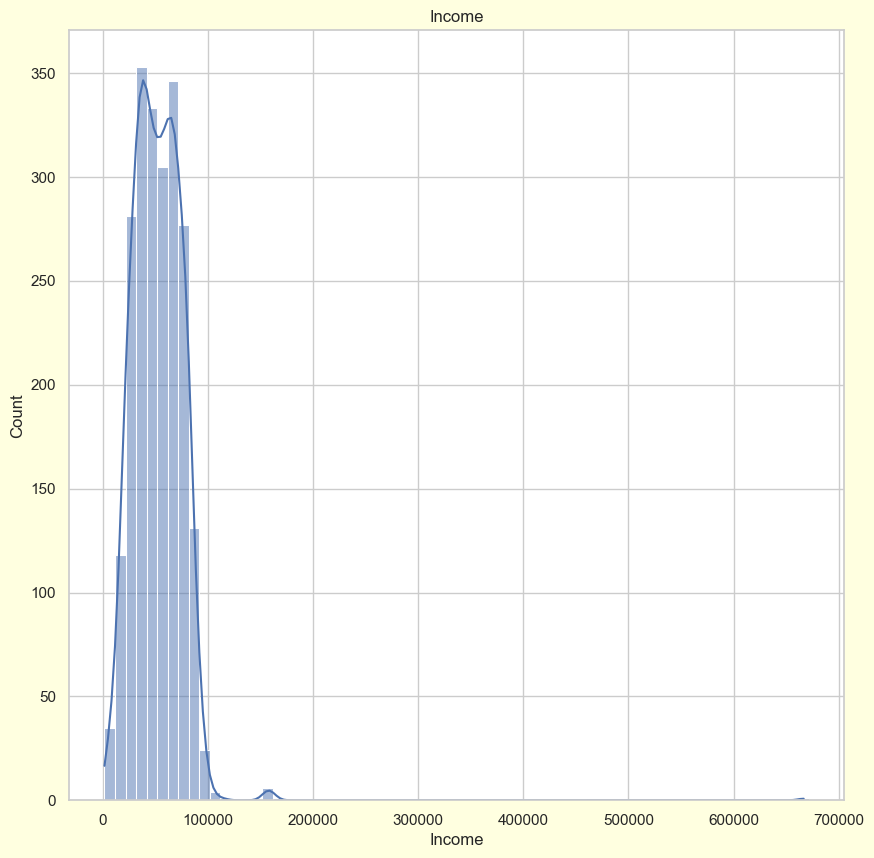

In [11]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

The income graph shows that the majority of the clients have incomes between $30,000 and $800,000.

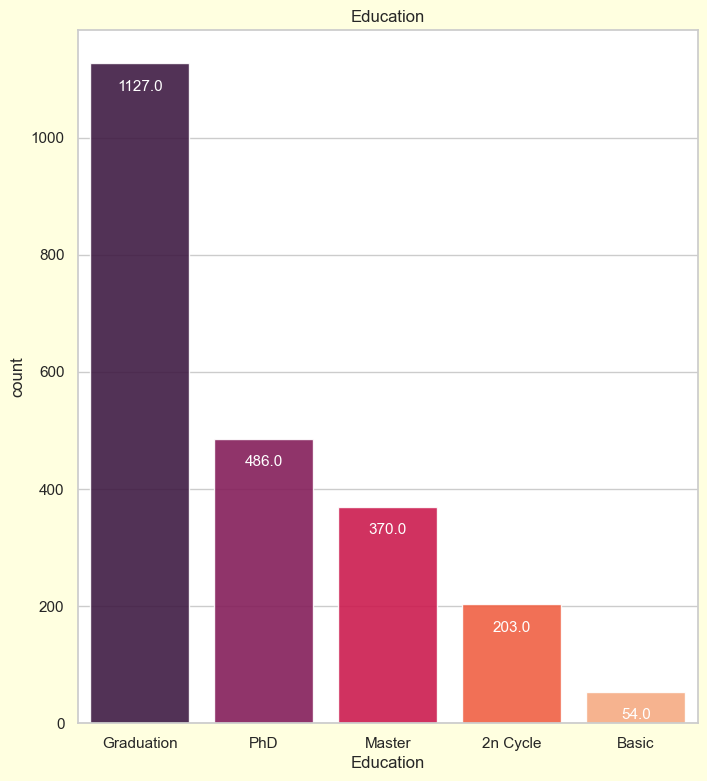

In [12]:
plt.figure(figsize=(8, 9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

The majority of clients come from graduate-level educational backgrounds, according to the education graph.

Text(0, 5, '2')

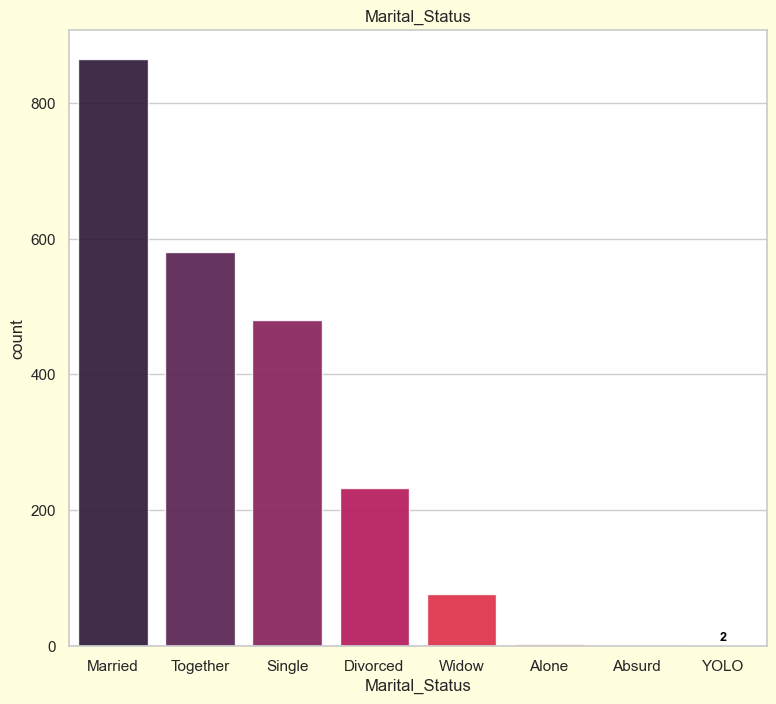

In [13]:
plt.figure(figsize=(9, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=data['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

The graph of marital status shows that the majority of consumers are already married.

Text(0, 5, '48')

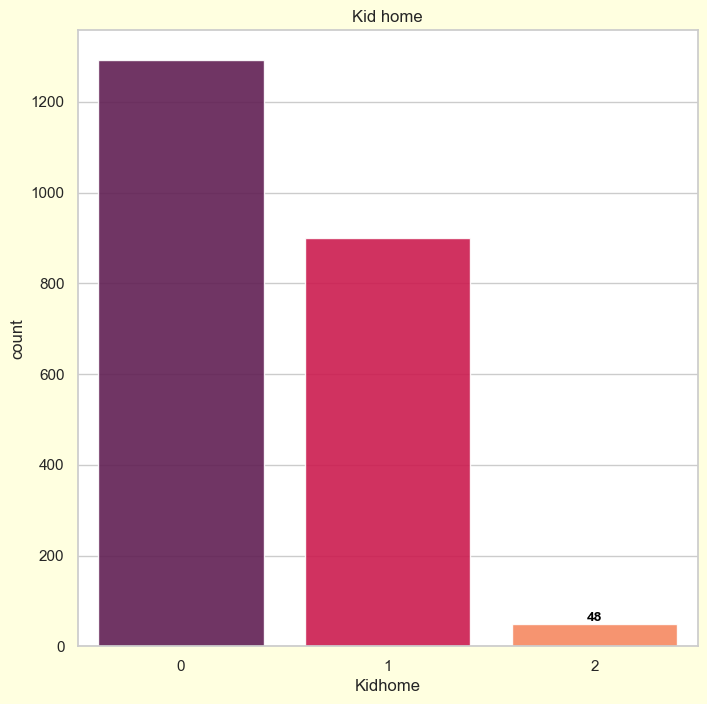

In [14]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Kidhome', saturation=1, alpha=0.9, palette='rocket', order=data['Kidhome'].value_counts().index)
ax.set_title('Kid home')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

Text(0, 5, '52')

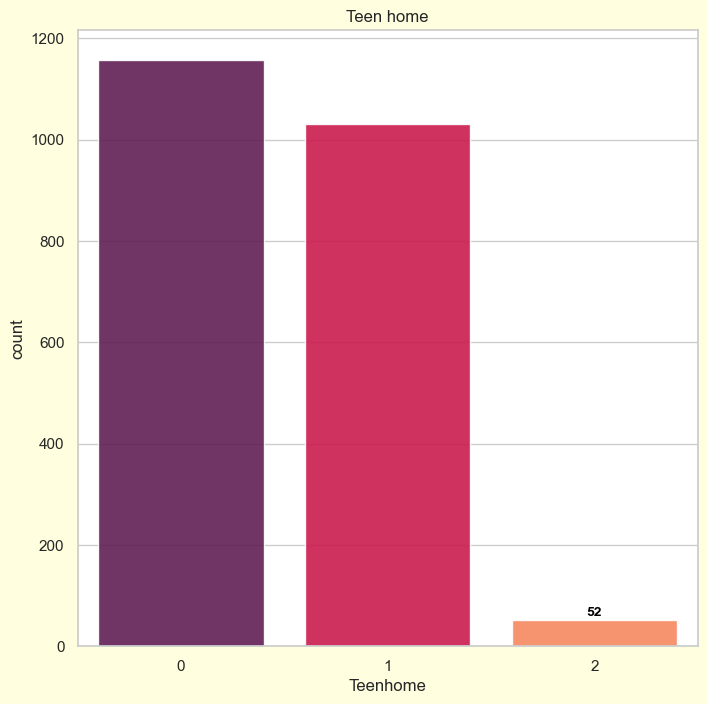

In [15]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Teenhome', saturation=1, alpha=0.9, palette='rocket', order=data['Teenhome'].value_counts().index)
ax.set_title('Teen home')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

Text(-49, 0, '680816')

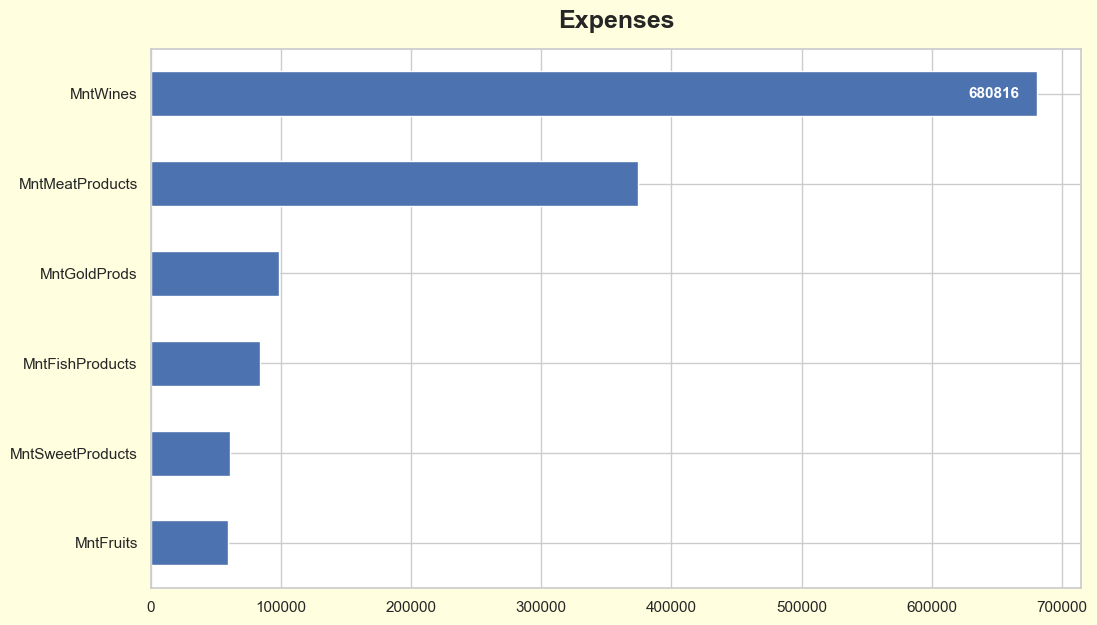

In [16]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

Wine has the largest sell amount as seen by the graph of total expenses.

<Axes: >

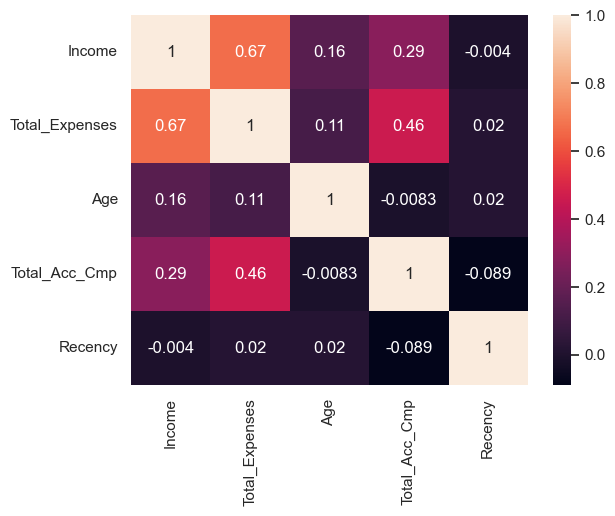

In [17]:
sns.heatmap(data[['Income', 'Total_Expenses','Age', 'Total_Acc_Cmp', 'Recency']].corr(), annot=True)


Thus, age, total accepted campaigns, total expenses, revenue, and recency are correlated with each other. Income and total expenditures have the strongest link, followed by expenditures and the total number of campaigns that were accepted.

# Feature Engineering


In [18]:
df = pd.read_excel("marketing_campaign.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [19]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [20]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [21]:
# Check the skewness before imputation of numeric cols
df['Income'].skew()

6.763487372811116

In [22]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [23]:
# check the unique values
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [24]:
# check the unique values
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
# findout the first and last date in dataset
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

In [26]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [27]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [28]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [29]:
print(df.shape)
df.sample(5)

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
991,2n Cycle,Married,24884.0,1,0,32,3,6,7,0,...,19,4,0,2012,November,Thursday,Adult,1,Yes,Undergraduate
44,Master,Married,7500.0,1,0,19,3,1,10,3,...,31,8,0,2013,October,Wednesday,Adult,1,Yes,Postgraduate
286,Graduation,Together,75278.0,0,0,17,304,98,230,150,...,930,23,0,2013,January,Tuesday,Middel Aged,0,Yes,Graduate
432,2n Cycle,Together,67309.0,1,1,76,515,47,181,149,...,1082,39,0,2013,January,Wednesday,Middel Aged,2,Yes,Undergraduate
2112,Graduation,Together,34587.0,1,1,68,7,2,9,2,...,22,6,0,2014,May,Friday,Middel Aged,2,Yes,Graduate


In [30]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

In [31]:
num_col = df1.select_dtypes(include = np.number).columns

In [32]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


The above dataset is really good to perform EDA. 
I can extract really good insights from all these columns.
However i won't be using all these columns to form clusters. Lots of the data we have like Amount spents on different products, number of purchases etc. This data won't be available for new customers. 
So i will be training model using those columns only wich will be available for new customers so the model can predict the cluster. 

In [33]:
# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


In [34]:
# examin the min, max and mean of your columns
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


In [35]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

In [36]:
# I am not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [37]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [38]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [39]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [40]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

In [41]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


# PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=3) # just 3 columns
pca.fit(transformed)

PCA(n_components=3)

In [44]:
x_pca = pca.fit_transform(transformed)

In [45]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.42843601 0.27619042 0.15891106]
sum:  0.8635374920659791


In [46]:
PCA_ds = pd.DataFrame(pca.transform(transformed), columns=["col1", "col2", "col3"])
PCA_ds

,col1,col2,col3
0,0.863189,-0.472963,0.891036
1,0.652869,-1.054137,0.896467
2,0.824555,0.453469,-0.525903
3,-1.783589,0.040784,-0.489716
4,-0.370672,0.911400,-0.471933
...,...,...,...
2235,0.363755,0.216524,-0.518758
2236,1.894673,-0.966299,-0.493108
2237,-0.599114,0.909221,0.903925
2238,1.473497,-0.194954,-0.491108


In [47]:
x1 = PCA_ds["col1"]
x2 = PCA_ds["col2"]
x3 = PCA_ds["col3"]

In [48]:
from mpl_toolkits.mplot3d import Axes3D

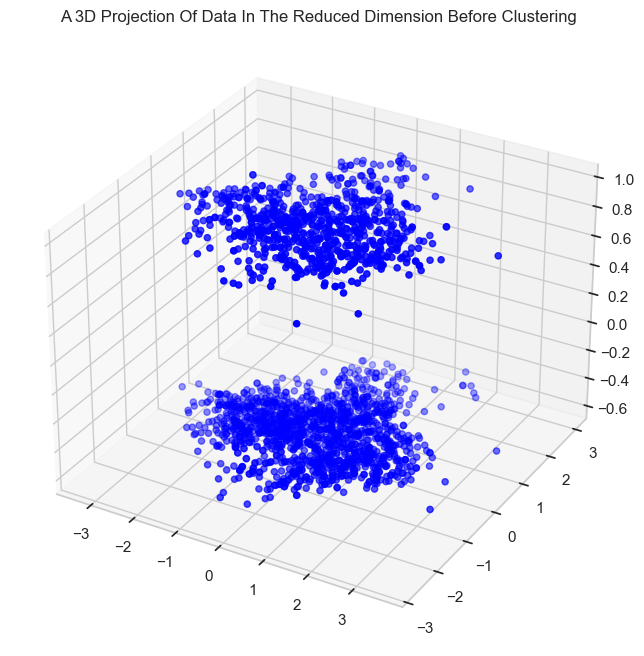

In [49]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1,x2,x3, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension Before Clustering")
plt.show()

# Clustering

# Hierarchial Clustering

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram

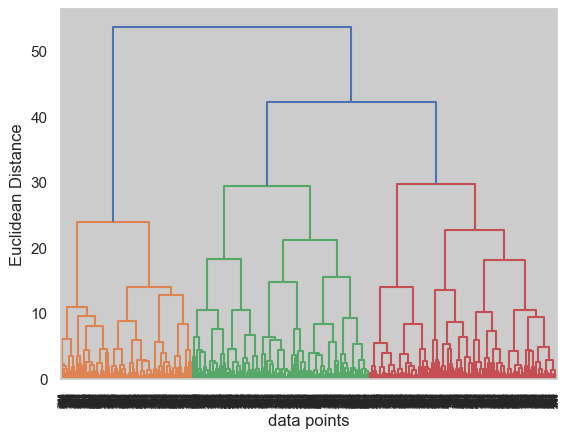

In [51]:
merg = linkage(transformed, method="ward")
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("Euclidean Distance")
plt.show()

# DBscan clustering

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
# Set the epsilon (eps) and minimum samples (min_samples) for DBSCAN
eps = 0.5  # Radius within which to search for neighboring points
min_samples = 5  # Minimum number of points required to form a dense region

In [54]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(transformed)

In [55]:
# Print cluster assignments (-1 for noise points)
print("Cluster Assignments:")
print(labels)

Cluster Assignments:
[0 0 1 ... 0 2 2]


# KMeans clustering

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

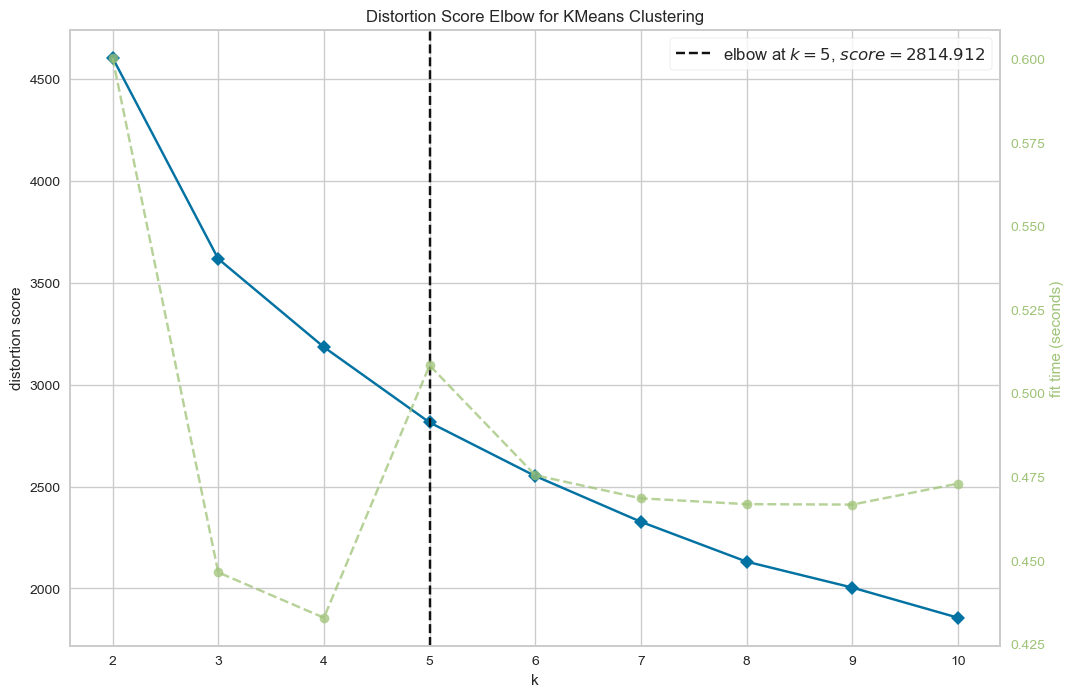

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

In [57]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_13620\2458525861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column


In [58]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,0
3,26646.0,1,0,30,Yes,Graduate,3
4,58293.0,1,0,33,Yes,Postgraduate,0


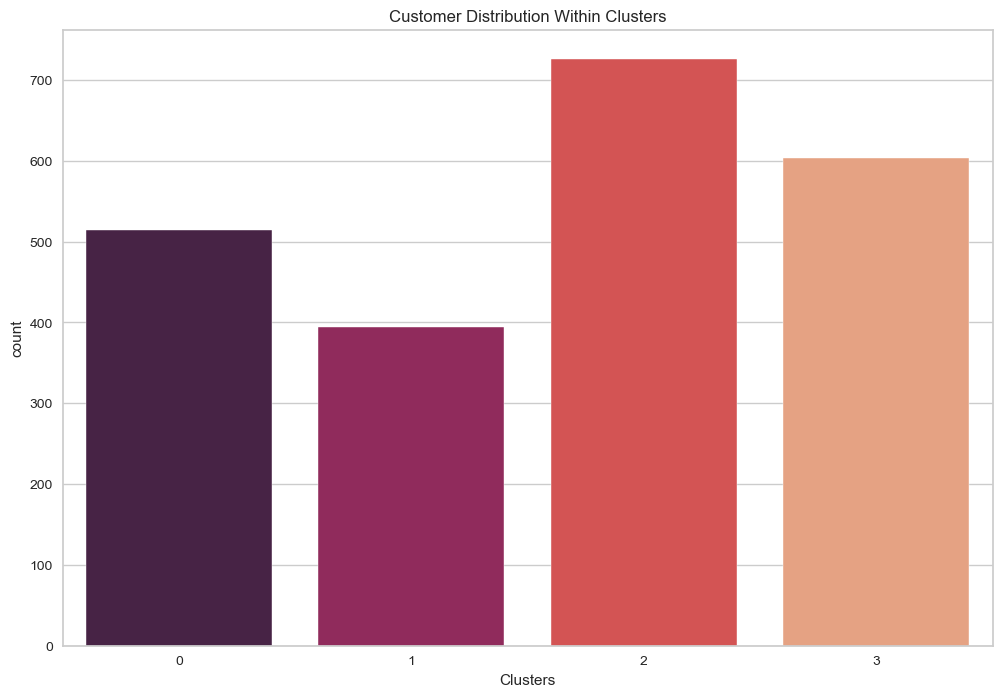

In [59]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset, palette='rocket')
plt.title('Customer Distribution Within Clusters')
plt.show()

Observations 
1. Cluster 2 has highest number of customers
2. Cluster 3 has least number of customers

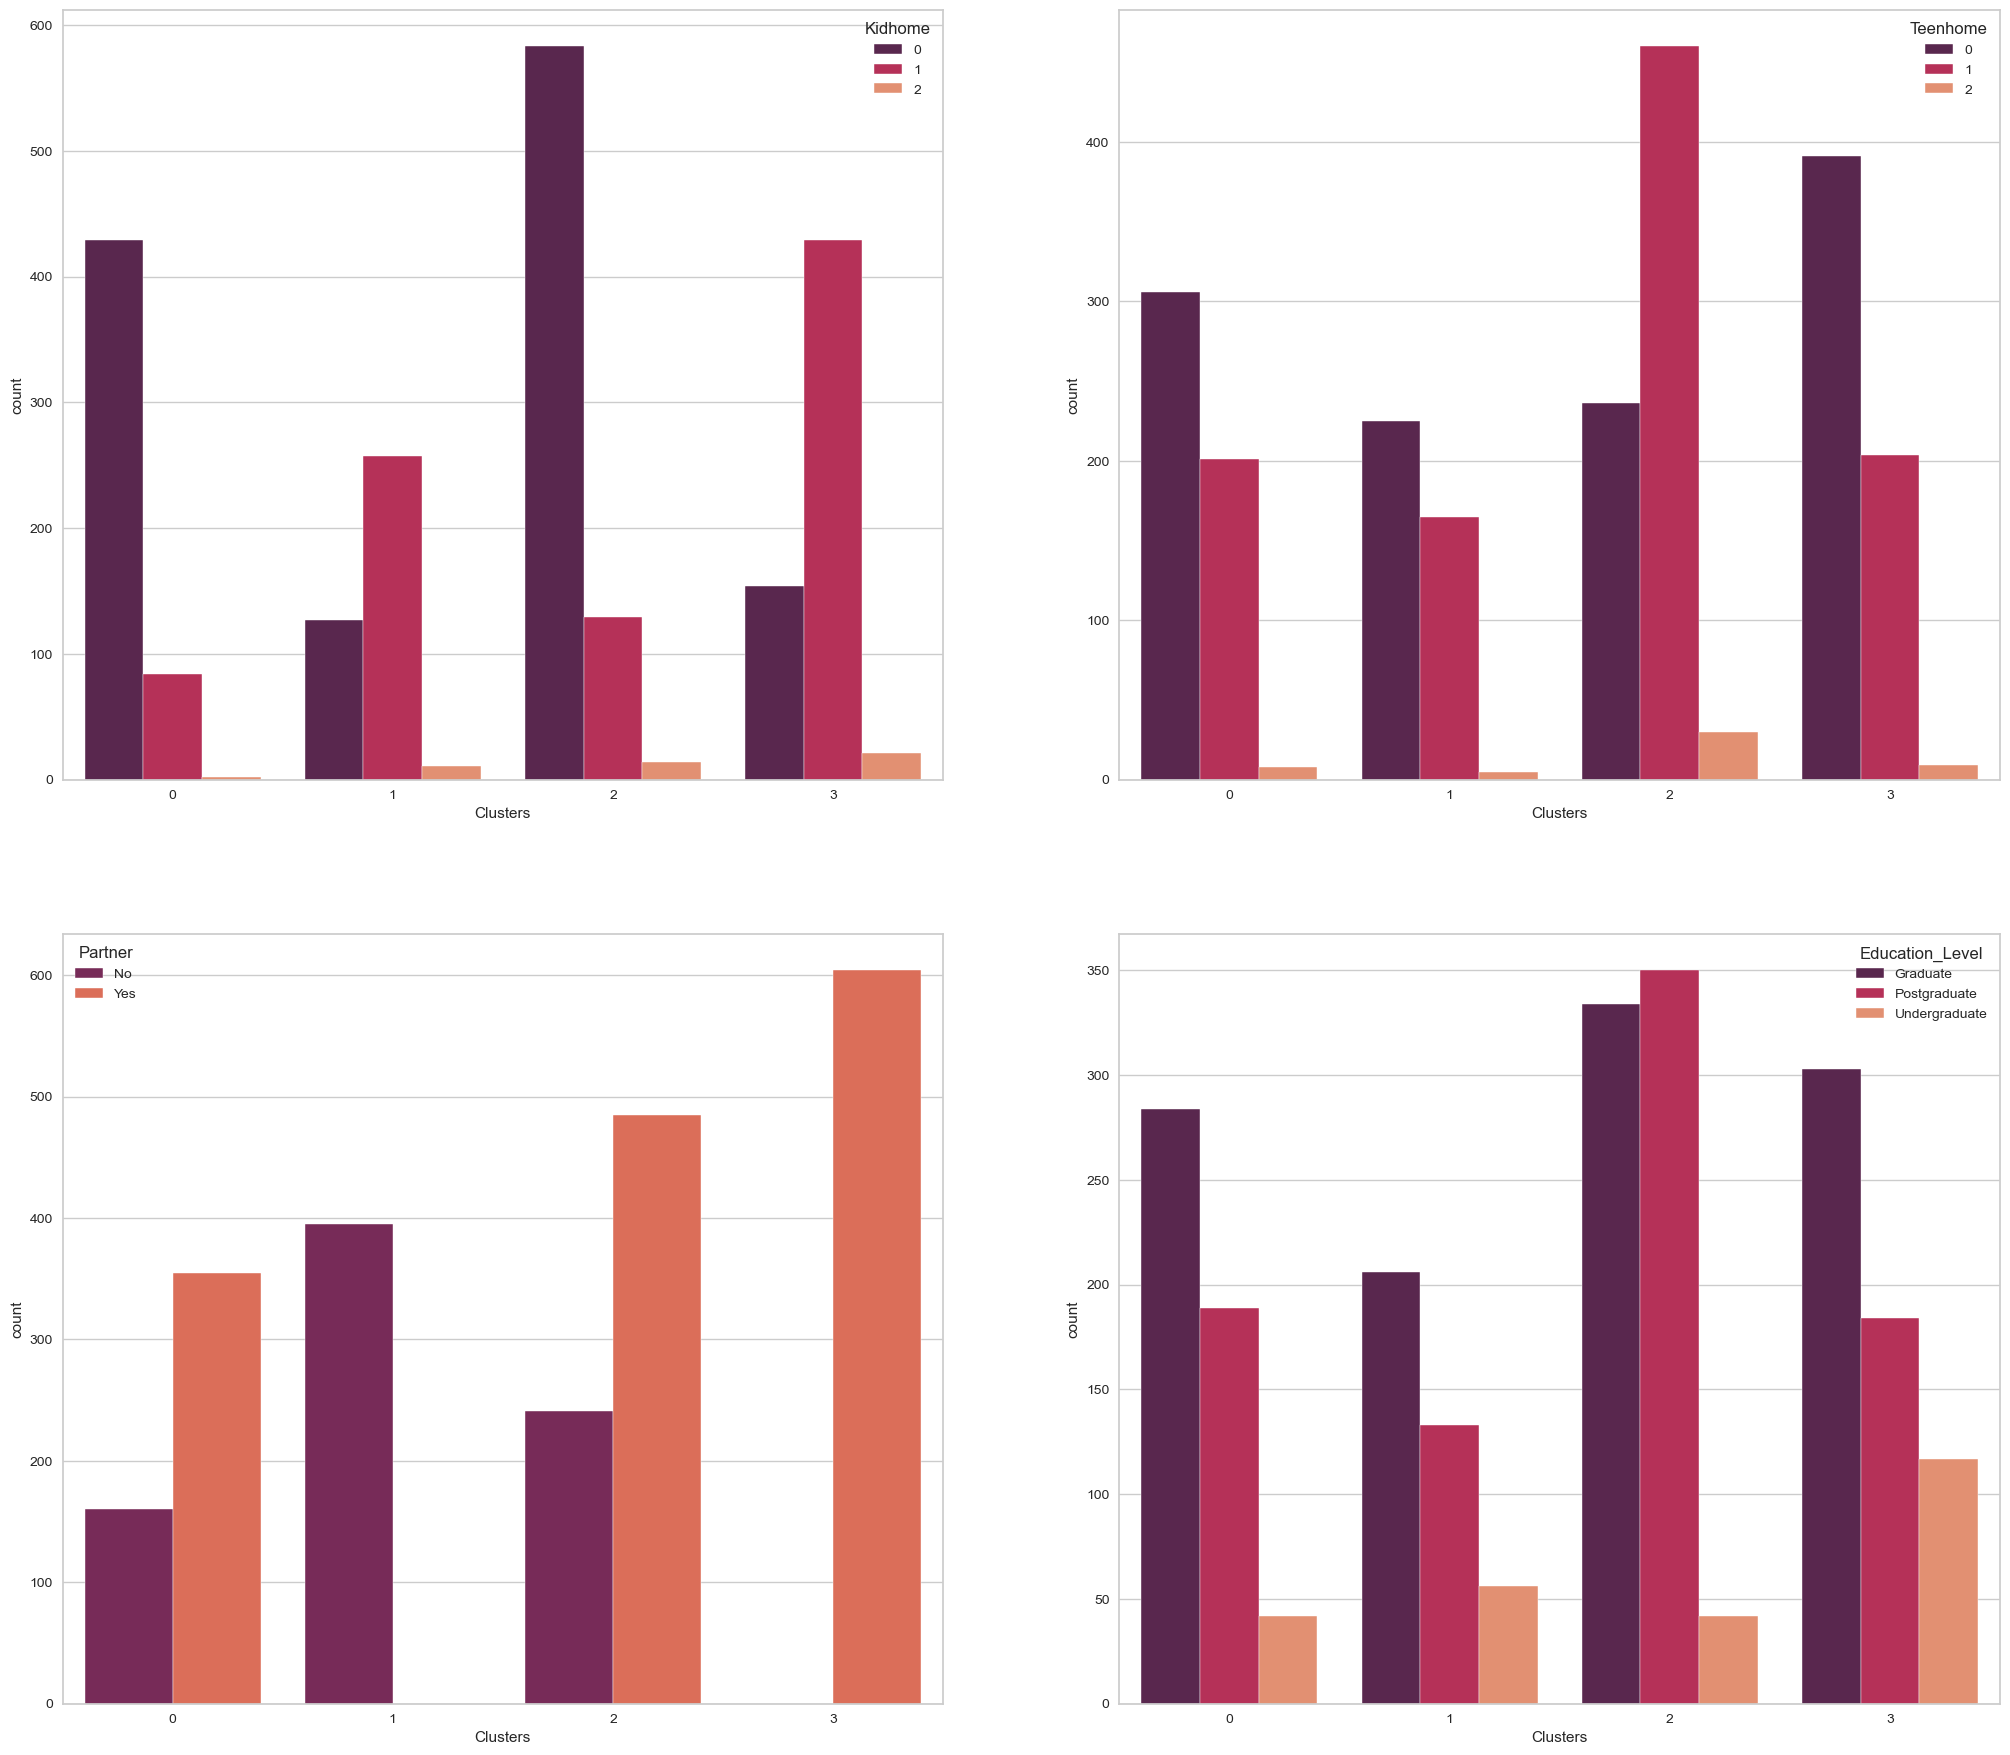

In [60]:
# create list of categories
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col,palette='rocket')
    
plt.show()

Observations

Kidhome:

Cluster 0 mostly has customers with 1 kid in household
Cluster 1 has customers with no kids in household
Cluster 2 also has large number of customers with no kids in household
Cluster 3 has customers with 0 and 1 kids in household
Teenhome:

Cluster 0 consist of customers with no teen in household & few of them have 1 Teen in household
Same goes for the cluster 1 & 3
Cluster 2 has customers with 1 Teen in household
Partner:

All the customers in cluster 0 have partner
All The customers in cluster 3 have no partner
Cluster 1 & 2 has customers with and without partner, but most of them have partner
Education_Level:

All clusters have customers with graduate, postgraduate and undergraduate background

All clusters have less number of customers with undergraduate background

Cluter 2 has highest number of postgraduates and graduates

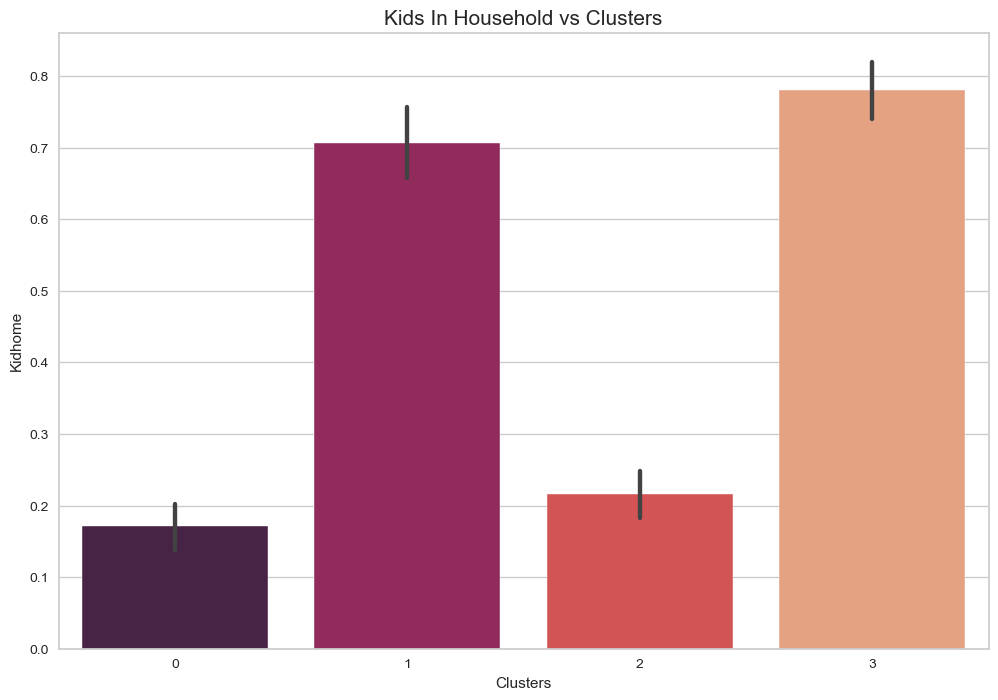

In [61]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"],palette='rocket')
plt.title("Kids In Household vs Clusters", size=15)
plt.show()

Observation:

Cluster 0 and 3 has the maximum number of customers with kids in household
Cluster 1 and 2 has the least number of customers with kids in household

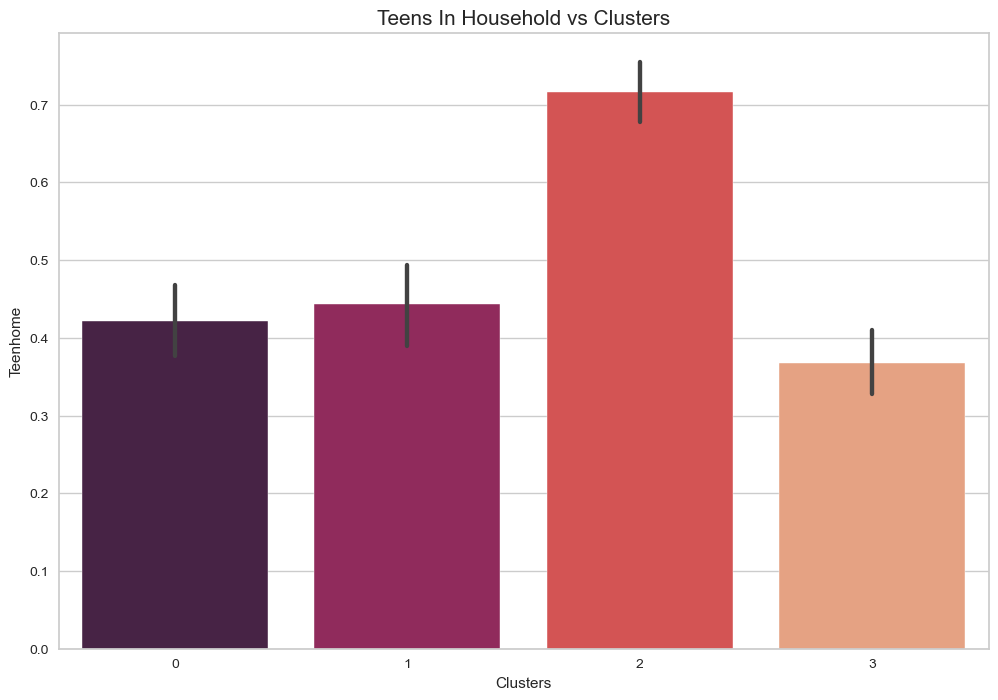

In [62]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"],palette='rocket')
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

Observations

1. Cluster 2 has maximum number of customers having Teens in household
2. Remaining Clusters also have customers with Teens in household but they are less as compared to cluster

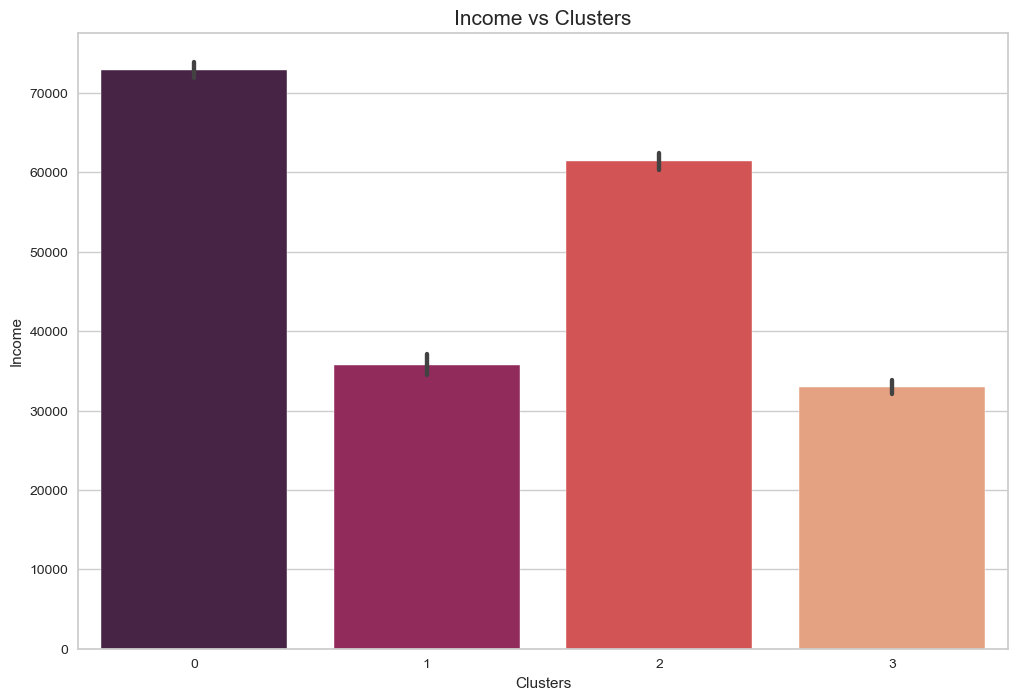

In [63]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Income"],palette='rocket')
plt.title("Income vs Clusters", size=15)
plt.show()

Observations 
1. Cluster 1 has high Income followed by cluster 2. cluster 2 has highest number of customers and most number of post graduates & graduates as compared to cluster 1
2. Cluster 0 and 3 has least income

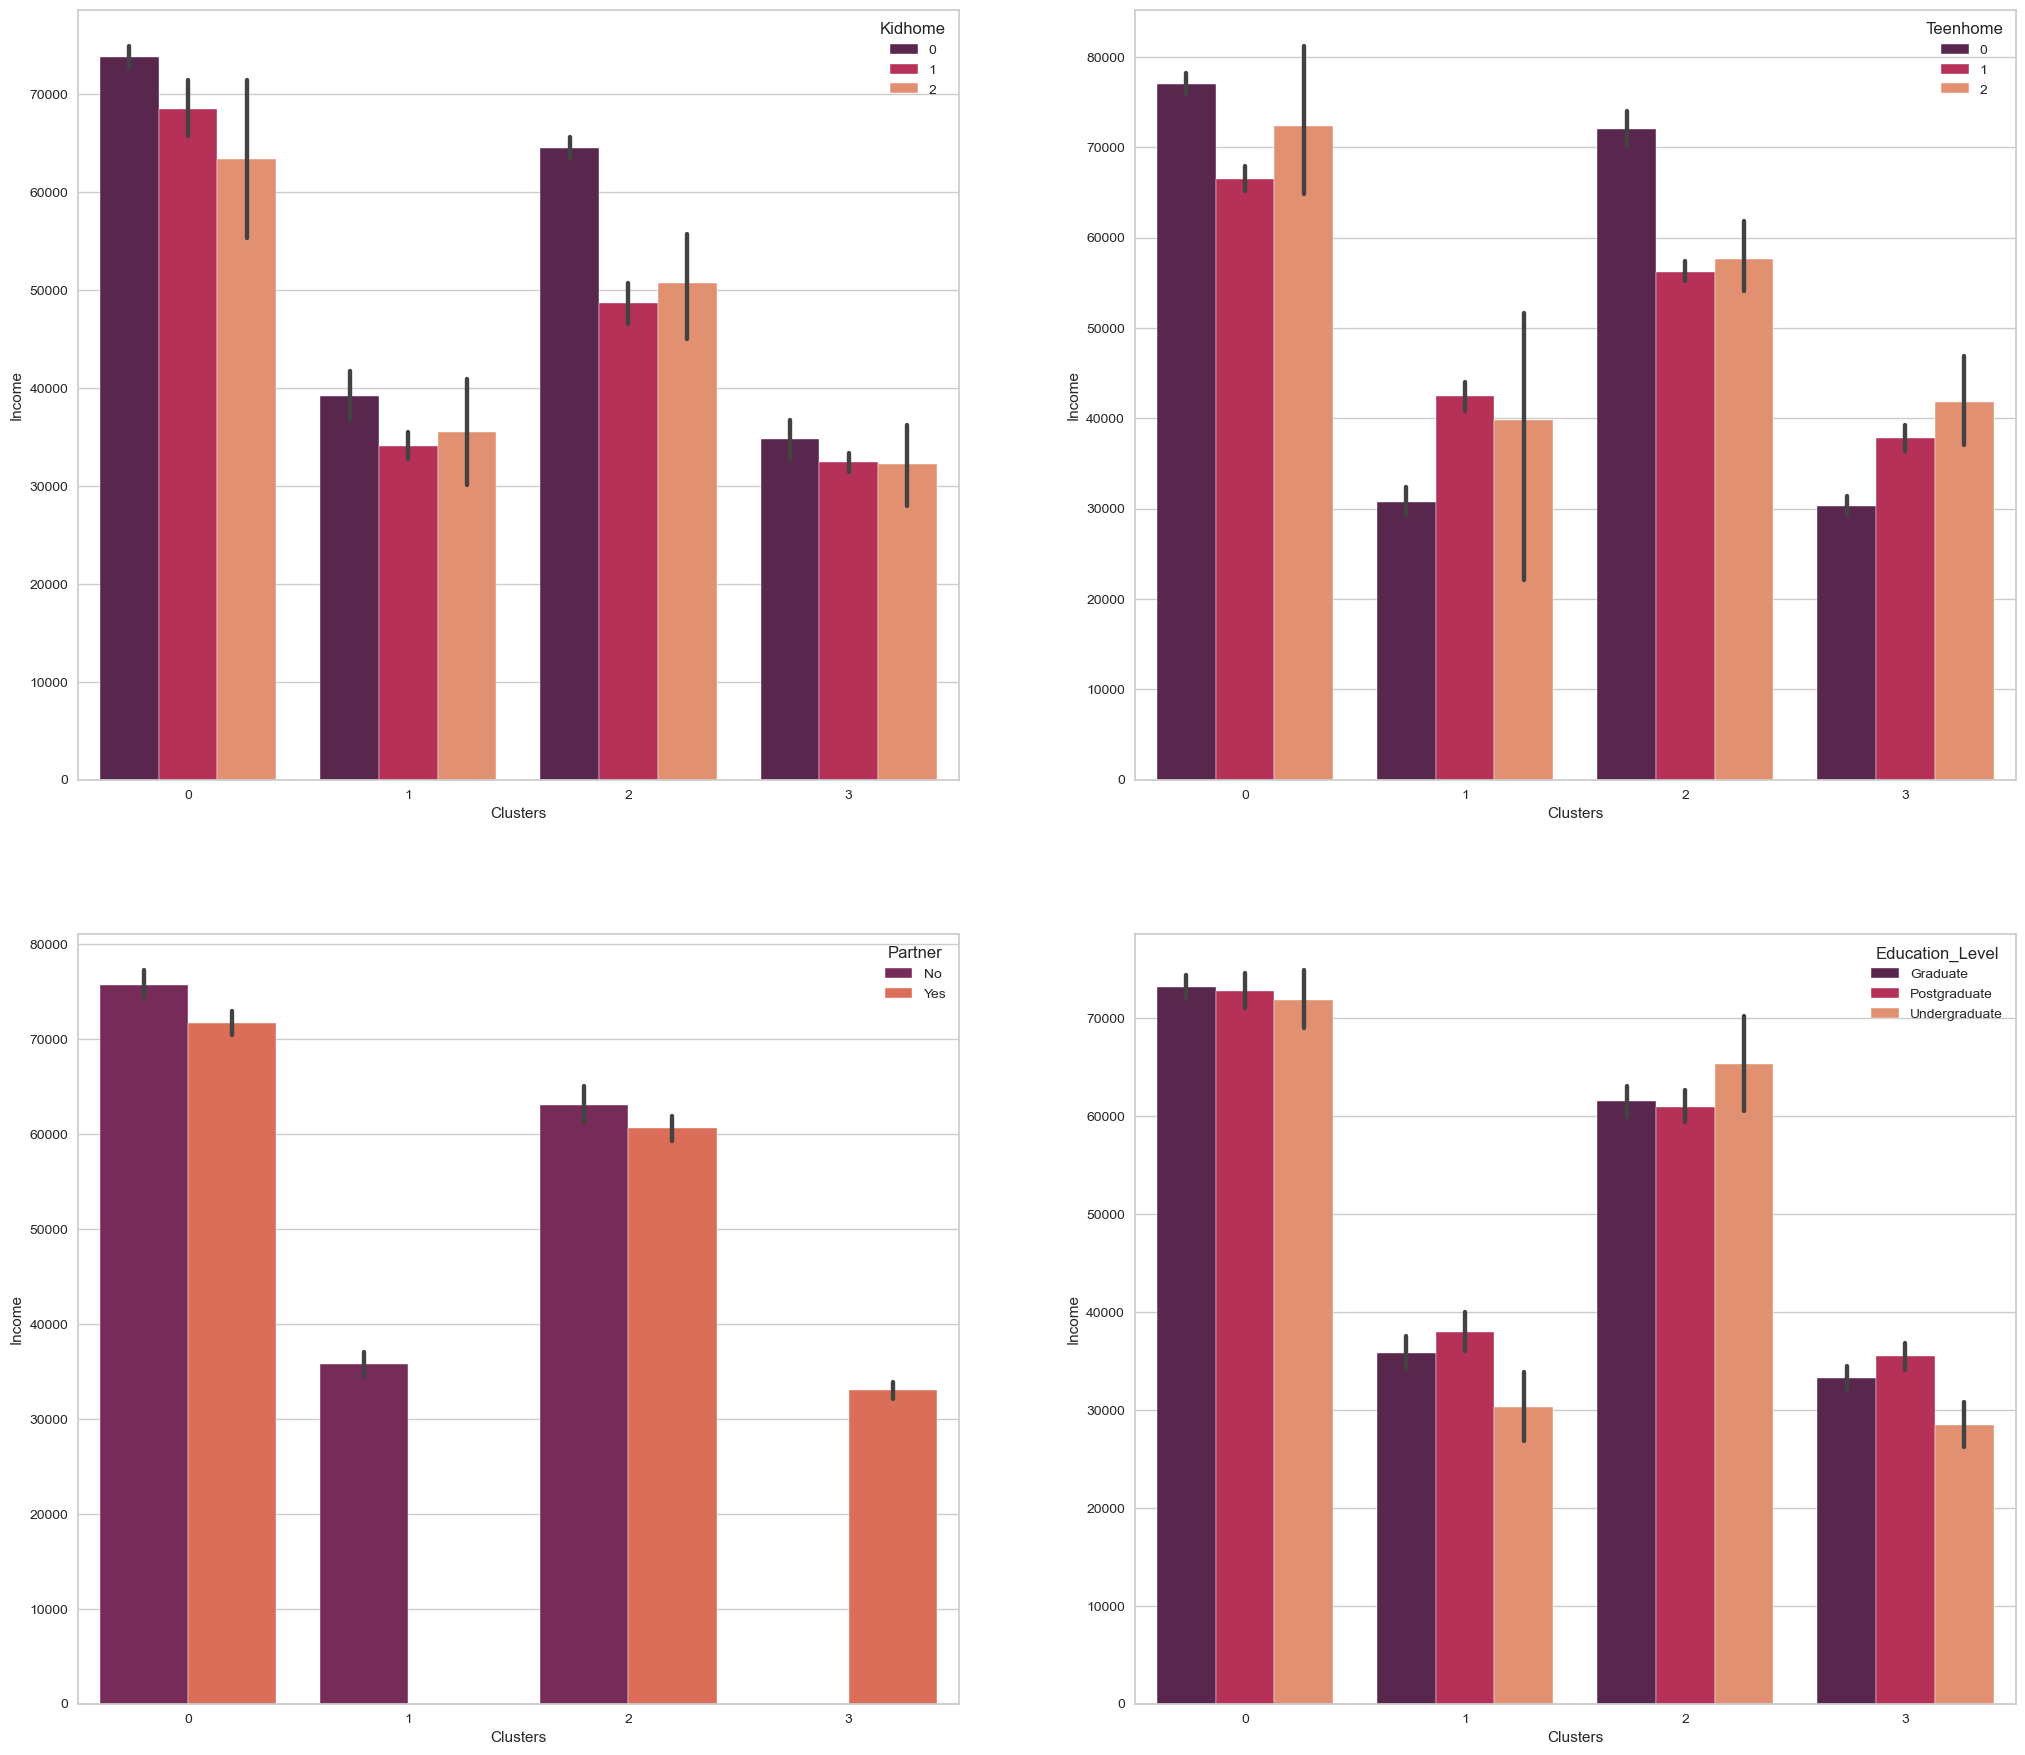

In [64]:
catcols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(catcols):
    sns.barplot(x='Clusters', y='Income', data=subset, ax=ax1[i//2, i%2],hue=col,palette='rocket')
    
plt.show()

Observations 

1. Very interesting thing i can see from first 2 plots is, We saw before the number of customers with 2 kids or teens is very very less still their income is similar to the customers which have no kids or teens or have 1 kid & teen. So I conclude that the customers with more than 1 kid or teen in houehold has high household income 1

2. From last 2 plots i think education_level and partner has nothing to do with income. Infact undergraduates are earniing equal or more than graduates and postgraduates within each cluster.

#                                                    Clusters Details

About Cluster 0:

Least income
1 kid and few have one teen also
Graduate and Postgraduates but also have most undegraduates
than any other clusters
All have partners

About Cluster 1:

Fewer customers but with highest income
No kids, few have one teen
Graduate and Postgraduates
Most of them have partners

About Cluster 2:

Maximum number of customers and high income
No kids and few have one or two teen 
High number of Graduate and Postgraduates
Most of them have partners

About Cluster 3:

Fewer customers and less income
1 kid and few have one teen also
Graduate and Postgraduates
All have no partners

# Model building and Model Evaluation

In [65]:
subset

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,0
3,26646.0,1,0,30,Yes,Graduate,3
4,58293.0,1,0,33,Yes,Postgraduate,0
...,...,...,...,...,...,...,...
2235,61223.0,0,1,47,Yes,Graduate,0
2236,64014.0,2,1,68,Yes,Postgraduate,2
2237,56981.0,0,0,33,No,Graduate,1
2238,69245.0,0,1,58,Yes,Postgraduate,2


In [66]:
model_data = subset.copy()

In [67]:
X = model_data.iloc[:,0:6]
Y = model_data.iloc[:,6]

In [68]:
X

,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate
...,...,...,...,...,...,...
2235,61223.0,0,1,47,Yes,Graduate
2236,64014.0,2,1,68,Yes,Postgraduate
2237,56981.0,0,0,33,No,Graduate
2238,69245.0,0,1,58,Yes,Postgraduate


In [69]:
Y

0       2
1       2
2       0
3       3
4       0
       ..
2235    0
2236    2
2237    1
2238    2
2239    2
Name: Clusters, Length: 2240, dtype: int32

# GradientBoosting Classifier

In [70]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,stratify = Y) 

In [72]:
# adding GradientBoostingClassifier to transformer pipeline
gradient_boosting = make_pipeline(transformer, GradientBoostingClassifier())

In [73]:
# fit the data to new pipeline & model
gradient_boosting.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [74]:
# check the F1 score of our model
y_pred=gradient_boosting.predict(x_test)

In [75]:
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.9933035714285714


Gradient boosting have F1 score 0.9866071428571429

In [76]:
model_data1=model_data.copy()

In [77]:
model_data1

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,0
3,26646.0,1,0,30,Yes,Graduate,3
4,58293.0,1,0,33,Yes,Postgraduate,0
...,...,...,...,...,...,...,...
2235,61223.0,0,1,47,Yes,Graduate,0
2236,64014.0,2,1,68,Yes,Postgraduate,2
2237,56981.0,0,0,33,No,Graduate,1
2238,69245.0,0,1,58,Yes,Postgraduate,2


In [78]:
# label encoding on marital status and ordinal encoding for education
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(model_data1['Partner'])
model_data1['Partner'] = lenc.transform(model_data1['Partner'])
lenc.fit(model_data1['Education_Level'])
model_data1['Education_Level'] = lenc.transform(model_data1['Education_Level'])

In [79]:
model_data1

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,0,0,2
1,46344.0,1,1,60,0,0,2
2,71613.0,0,0,49,1,0,0
3,26646.0,1,0,30,1,0,3
4,58293.0,1,0,33,1,1,0
...,...,...,...,...,...,...,...
2235,61223.0,0,1,47,1,0,0
2236,64014.0,2,1,68,1,1,2
2237,56981.0,0,0,33,0,0,1
2238,69245.0,0,1,58,1,1,2


In [80]:
X = model_data1.iloc[:,0:6]
Y = model_data1.iloc[:,6]

In [81]:
X

,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,0,0
1,46344.0,1,1,60,0,0
2,71613.0,0,0,49,1,0
3,26646.0,1,0,30,1,0
4,58293.0,1,0,33,1,1
...,...,...,...,...,...,...
2235,61223.0,0,1,47,1,0
2236,64014.0,2,1,68,1,1
2237,56981.0,0,0,33,0,0
2238,69245.0,0,1,58,1,1


In [82]:
Y

0       2
1       2
2       0
3       3
4       0
       ..
2235    0
2236    2
2237    1
2238    2
2239    2
Name: Clusters, Length: 2240, dtype: int32

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,stratify = Y) 

# SVM

In [84]:
from sklearn import metrics
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# 1. Linear

In [85]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)

In [86]:
# check the F1 score of our model
f1 = f1_score(y_test, pred_test_linear, average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.8370535714285714


# 2. Poly

In [87]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [88]:
# check the F1 score of our model
f1 = f1_score(y_test, pred_test_poly, average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.5357142857142857


# 3. Sigmoid

In [89]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)

In [90]:
# check the F1 score of our model
f1 = f1_score(y_test, pred_test_sigmoid, average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.11160714285714286


In SVM Linear has the highest F1 score of 0.8616071428571429

# Naive's Bayes

# GaussianNB

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [92]:
clsfrgnb = GaussianNB()

In [93]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [94]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [95]:
confusion_matrix(y_test, y_pred_gnb)

array([[102,   0,   0,   1],
       [  5,  66,   8,   0],
       [  1,   0, 143,   1],
       [  3,   0,   5, 113]], dtype=int64)

In [96]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
0,103
1,79
2,145
3,121


In [97]:
# check the F1 score of our model
f1 = f1_score(y_test, y_pred_gnb,average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.9464285714285714


For Gaussian Naive's Bayes F1 score is 0.9486607142857143

# KNN Model

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    141
3    130
0    108
1     69
dtype: int64

In [101]:
model.score(x_train,y_train)

0.6841517857142857

In [102]:
# check the F1 score of our model
f1 = f1_score(y_test, preds, average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.5223214285714286


For KNN model the F1 score is 0.5401785714285714

# Decision Tree

In [103]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report

# Building Decision Tree Classifier using Entropy Criteria¶

In [104]:
# Decision tree using entropy
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

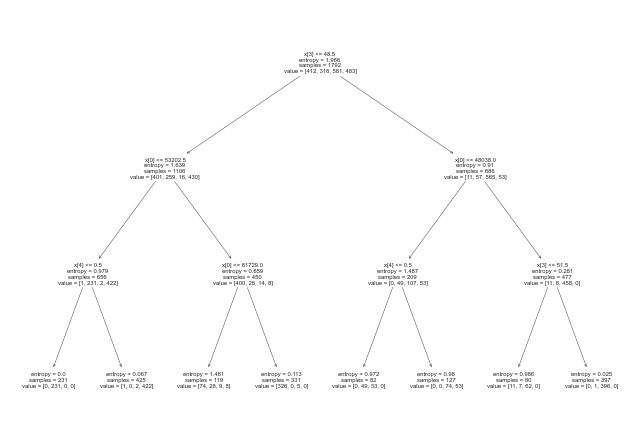

In [105]:
tree.plot_tree(model);

In [106]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    155
3    110
0    110
1     73
dtype: int64

In [107]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2,3
Clusters,,,,
0,97,0,6,0
1,6,69,4,0
2,7,4,133,1
3,0,0,12,109


In [108]:
# check the F1 score of our model
f1 = f1_score(y_test, preds,average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.9107142857142857


# Building Decision Tree Classifier (CART) using Gini Criteria

In [109]:
# Decision tree using Gini criteria
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [110]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9107142857142857

In [111]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [112]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [113]:
#Prediction 
pred=model.predict(x_test)

In [114]:
# check the F1 score of our model
f1 = f1_score(y_test, pred,average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.9107142857142857


The Decision tree has 0.9196428571428571 F1 score

# Random Forest

In [115]:
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)

In [117]:
# check the F1 score of our model
f1 = f1_score(y_test, pred,average='micro')
print("F1 Score (micro):", f1)

F1 Score (micro): 0.9910714285714286


The Random forest has 0.9821428571428571 F1 score

After checking all the modules above Gradient Boosting have highest F1 score of 0.9866071428571429. Hence using same for further model deployement.

# Model Deployement

# Exporting the gradient_boosting with all the transformation and trained model

In [118]:
import pickle

In [119]:
filename = 'r_model.sav' # create a variable with name you wanna give to the file
pickle.dump(gradient_boosting, open(filename,'wb')) 